# KHUSHI SHAH

# The Sparks Foundation | GRIP February 2021 | Data Science  & Business Analytics

# Task 2 - Prediction using Unsupervised ML

**Importing libraries needed for the task**

In [54]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

**Loading the iris dataset**

In [55]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


**Description of data**

In [56]:
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [57]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Finding optimum number of clusters for k-means clustering by using the elbow method**

In [58]:
#calculation of inertia
x = data.iloc[:,0:4].values
WCSS = []
#Within-Cluster-Sum-of-Squares

for i in range(1,11):
  kmeans_model = KMeans(n_clusters = i, init = 'k-means++', random_state = 0,
                        n_init = 10, max_iter = 300)
  kmeans_model.fit(x)
  WCSS.append(kmeans_model.inertia_)

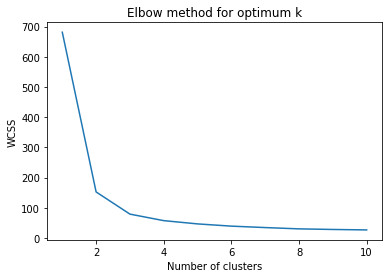

In [59]:
#plotting line graph for Number of clusters vs WCSS
plt.plot(range(1,11), WCSS)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method for optimum k')
plt.show()

From the above graph of the elbow method, it is clear that the optimum number of clusters is 3, as it is determined by where the elbow occurs.

**Applying k-means algorithm to the given dataset and taking k = 3**

In [60]:
kmeans_model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0,
                        n_init = 10, max_iter = 300)

y_kmeans = kmeans_model.fit_predict(x)

**Visualization of clusters and plotting the centroids of clusters**

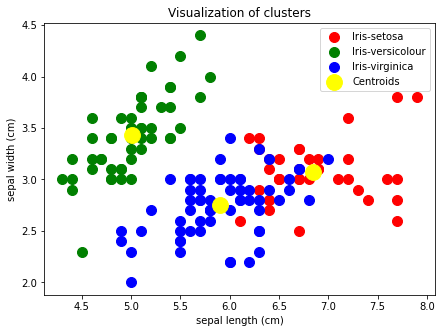

In [61]:
plt.figure(figsize = (7,5))

#Clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c= 'red', s = 100, 
            label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c= 'green', s = 100, 
            label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c= 'blue', s = 100, 
            label = 'Iris-virginica')

#Centroid
plt.scatter(kmeans_model.cluster_centers_[:, 0], 
            kmeans_model.cluster_centers_[:, 1],
            c = 'yellow', s=250, label = 'Centroids')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Visualization of clusters')
plt.legend()
plt.show()